In [42]:
import pandas as pd
import statsmodels.formula.api as smf
import plotnine as p9

In [43]:
df = pd.read_csv('beauty.csv').head(40)
df.head()

,tenured,profnumber,minority,age,beautyf2upper,beautyflowerdiv,beautyfupperdiv,beautym2upper,beautymlowerdiv,beautymupperdiv,...,nonenglish,onecredit,percentevaluating,profevaluation,students,tenuretrack,blkandwhite,btystdvariance,btystdavepos,btystdaveneg
0,0,1,1,36,6,5,7,6,2,4,...,0,0,55.81395,4.7,43,1,0,2.129806,0.201567,0.000000
1,1,2,0,59,2,4,4,3,2,3,...,0,0,85.00000,4.6,20,1,0,1.386081,0.000000,-0.826081
2,1,3,0,51,5,5,2,3,2,3,...,0,0,100.00000,4.1,55,1,0,2.537435,0.000000,-0.660333
3,1,4,0,40,4,2,5,2,3,3,...,0,0,86.95652,4.5,46,1,0,1.760577,0.000000,-0.766312
4,0,5,0,31,9,7,9,6,7,6,...,0,0,87.50000,4.8,48,1,0,1.693100,1.421450,0.000000


In [44]:
model = smf.ols('courseevaluation ~ btystdave', data=df).fit()
params = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.3876
Date:                Tue, 10 Dec 2019   Prob (F-statistic):              0.537
Time:                        23:31:27   Log-Likelihood:                -30.364
No. Observations:                  40   AIC:                             64.73
Df Residuals:                      38   BIC:                             68.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9060      0.086     45.496      0.000       3.732       4.080
btystdave     -0.0785      0.126     -0.623      0.537      -0.334       0.177
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                4.196
Skew:                          -0.762   Prob(JB):                        0.123
Kurtosis:                       3.444   Cond. No.                         1.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
fig=(p9.ggplot(p9.aes(x='btystdave',y='courseevaluation'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=params['Intercept'],slope=params['btystdave'])))

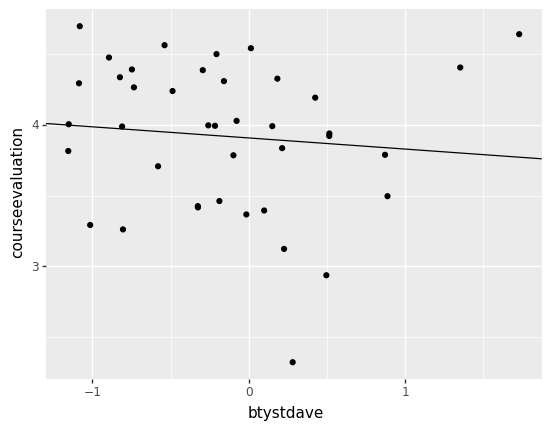

<ggplot: (-9223371895282347460)>

In [46]:
fig

In [47]:
df_tail = df.tail(40).copy()
df_tail['predict1']=model.predict()
df_tail['residuals1']=abs(df_tail['courseevaluation']-df_tail['predict1'])

In [48]:
fig_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals1'),data=df_tail)
      +p9.geom_point())

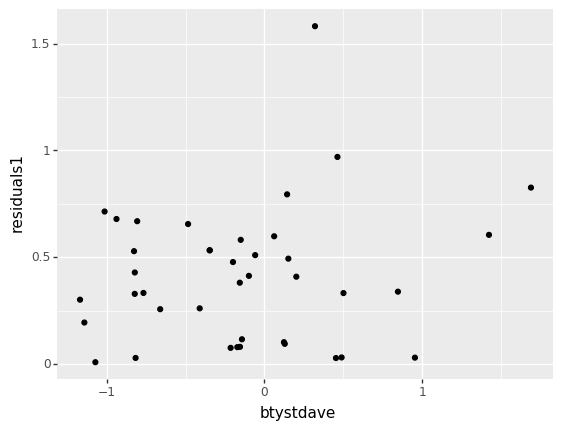

<ggplot: (-9223371895281266696)>

In [49]:
fig_res

In [50]:
sum(df_tail['residuals1'])/40

0.4108547611496688

Model z interakcjami  
Predykatory: btystdave, female   
Dane wejściowe: pierwsze 40 wierszy

In [51]:
model = smf.ols('courseevaluation ~ btystdave + female + btystdave*female', data=df).fit()
params = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.251
Date:                Tue, 10 Dec 2019   Prob (F-statistic):              0.306
Time:                        23:31:33   Log-Likelihood:                -28.583
No. Observations:                  40   AIC:                             65.17
Df Residuals:                      36   BIC:                             71.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.9104      0.122     32.109      0.000       3.663       4.157
btystdave           -0.2643      0.193     -1.371      0.179      -0.655       0.127
female              -0.1178      0.179     -0.658      0.515      -0.481       0.245
btystdave:female     0.4066      0.261      1.560      0.127      -0.122       0.935
==============================================================================
Omnibus:                        7.082   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.879
Skew:                          -0.891   Prob(JB):                       0.0529
Kurtosis:                       3.592   Cond. No.                         4.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
fig=(p9.ggplot(p9.aes(x='female',y='courseevaluation'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=params['Intercept'],slope=params['female'])))

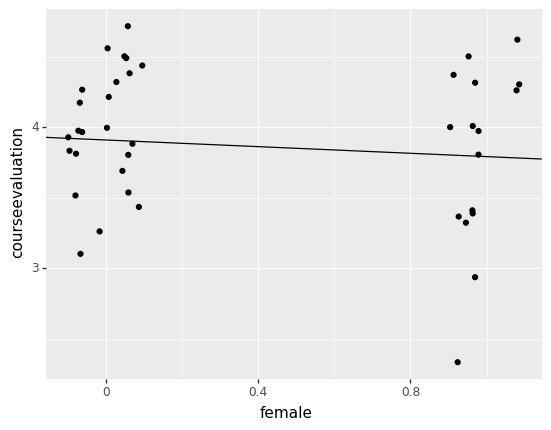

<ggplot: (-9223371895281235296)>

In [53]:
fig

In [54]:
df_tail['predict2']=model.predict()
df_tail['residuals2']=abs(df_tail['courseevaluation']-df_tail['predict2'])
fig_res=(p9.ggplot(p9.aes(x='btystdave',y='residuals2'),data=df_tail)
      +p9.geom_point())

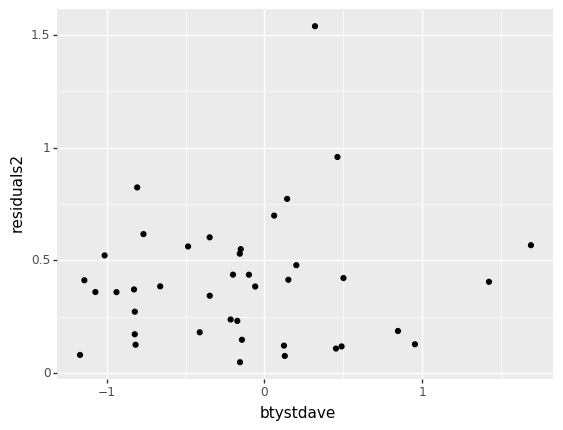

<ggplot: (-9223371895281206540)>

In [55]:
fig_res

In [56]:
sum(df_tail['residuals2'])/40

0.4047326756543768

Predykatory: btystdaveneg, profevaluation   
Dane wejściowe: pierwsze 40 wierszy

In [57]:
model = smf.ols('courseevaluation ~ btystdaveneg + profevaluation', data=df).fit()
params = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.59e-19
Time:                        23:31:37   Log-Likelihood:                 16.229
No. Observations:                  40   AIC:                            -26.46
Df Residuals:                      37   BIC:                            -21.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3622      0.194      1.868      0.070      -0.031       0.755
btystdaveneg      -0.1137      0.068     -1.670      0.103      -0.252       0.024
profevaluation     0.8514      0.047     18.116      0.000       0.756       0.947
==============================================================================
Omnibus:                       10.991   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.804
Skew:                          -1.007   Prob(JB):                      0.00451
Kurtosis:                       4.559   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
fig=(p9.ggplot(p9.aes(x='profevaluation',y='courseevaluation'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=params['Intercept'],slope=params['profevaluation'])))

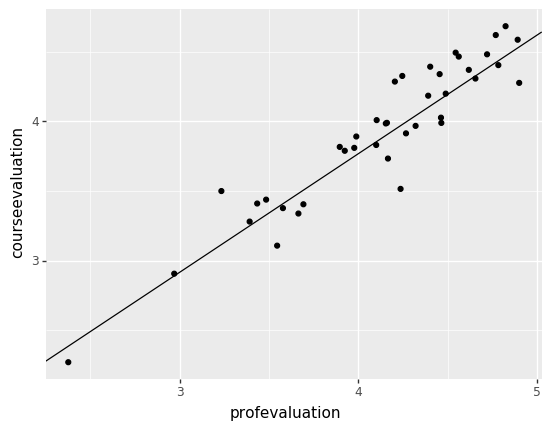

<ggplot: (-9223371895281238756)>

In [59]:
fig

In [60]:
df_tail['predict3']=model.predict()
df_tail['residuals3']=abs(df_tail['courseevaluation']-df_tail['predict3'])
fig_res=(p9.ggplot(p9.aes(x='courseevaluation',y='residuals3'),data=df_tail)
      +p9.geom_point())

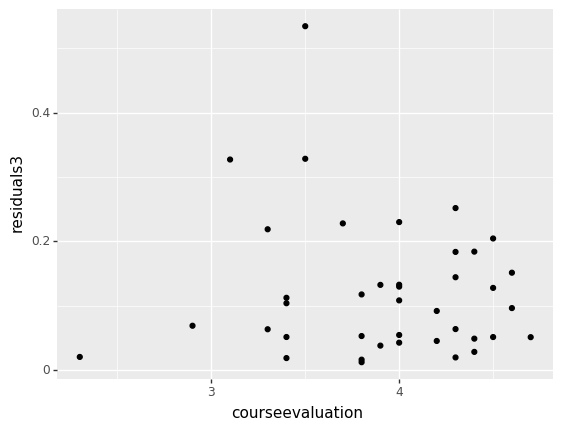

<ggplot: (-9223371895281244112)>

In [61]:
fig_res

In [62]:
sum(df_tail['residuals3'])/40

0.12207741411383943

Model z interakcjami  
Predykatory: btystdaveneg, profevaluation   
Dane wejściowe: pierwsze 40 wierszy

In [63]:
model = smf.ols('courseevaluation ~ btystdaveneg + profevaluation + profevaluation*btystdaveneg', data=df).fit()
params = model.params
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       courseevaluation   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     116.7
Date:                Tue, 10 Dec 2019   Prob (F-statistic):           1.32e-18
Time:                        23:31:45   Log-Likelihood:                 16.885
No. Observations:                  40   AIC:                            -25.77
Df Residuals:                      36   BIC:                            -19.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.4895      0.226      2.169      0.037       0.032       0.947
btystdaveneg                    0.5208      0.583      0.893      0.378      -0.662       1.704
profevaluation                  0.8201      0.055     14.942      0.000       0.709       0.931
profevaluation:btystdaveneg    -0.1515      0.138     -1.095      0.281      -0.432       0.129
==============================================================================
Omnibus:                       11.950   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.202
Skew:                          -1.065   Prob(JB):                      0.00224
Kurtosis:                       4.668   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
fig=(p9.ggplot(p9.aes(x='profevaluation',y='courseevaluation'),data=df)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=params['Intercept'],slope=params['profevaluation'])))

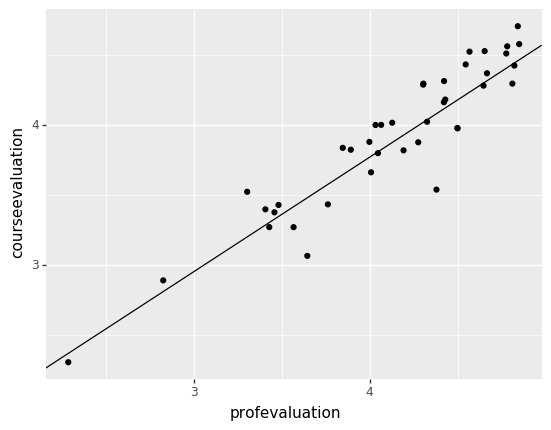

<ggplot: (-9223371895282363548)>

In [65]:
fig

In [66]:
df_tail['predict4']=model.predict()
df_tail['residuals4']=abs(df_tail['courseevaluation']-df_tail['predict4'])
fig_res=(p9.ggplot(p9.aes(x='courseevaluation',y='residuals4'),data=df_tail)
      +p9.geom_point())

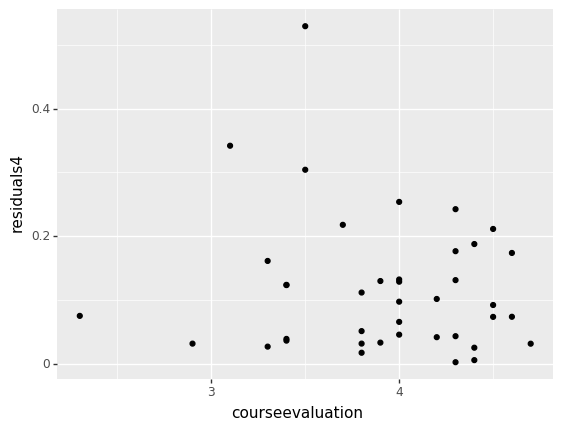

<ggplot: (-9223371895282372748)>

In [67]:
fig_res

In [68]:
sum(df_tail['residuals4'])/40

0.11852270580198358